<a href="https://colab.research.google.com/github/Manel-MH/CodingDojo_Project2_HeartFailure/blob/main/Project2_Heart_Failure_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Drive

In [1]:
# mount your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [65]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

Part2

Load Data

About this data https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [3]:
#load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/heart_failure_clinical_records_dataset (1).csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Univariates Distributions with visualizations

Plot age frequency of patients

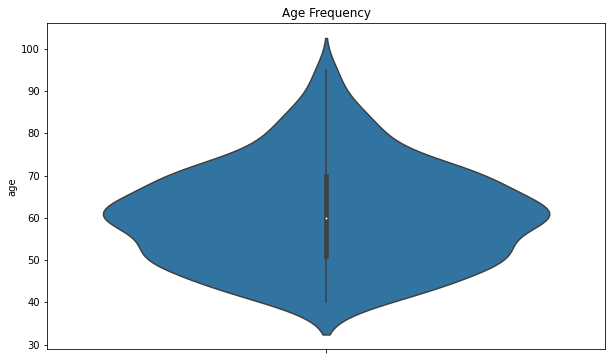

In [7]:
plt.figure(figsize=(10,6))
plt.title("Age Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["age"])
plt.show()

Boxplots to check for outliers

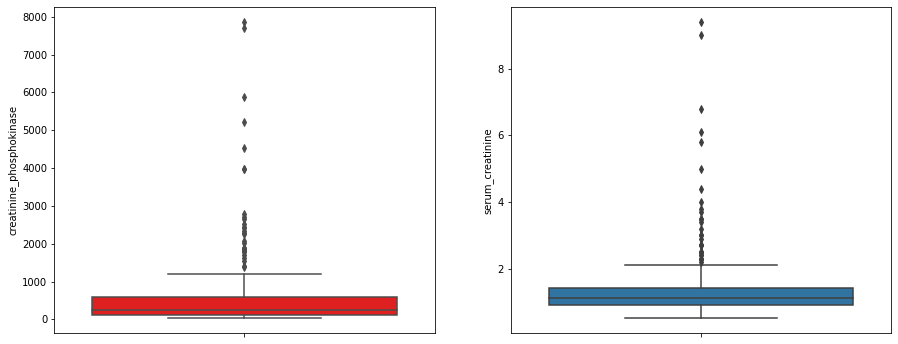

In [8]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df['creatinine_phosphokinase'], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df['serum_creatinine'])
plt.show()

These boxplots show the distribution range amongst the patients for creatinine_phosphokinase and serum_creatinine. The distribution is skewed towards lower end with outliers sitting on the higher end. These outliers seem possible if they are related to disease and outcome.

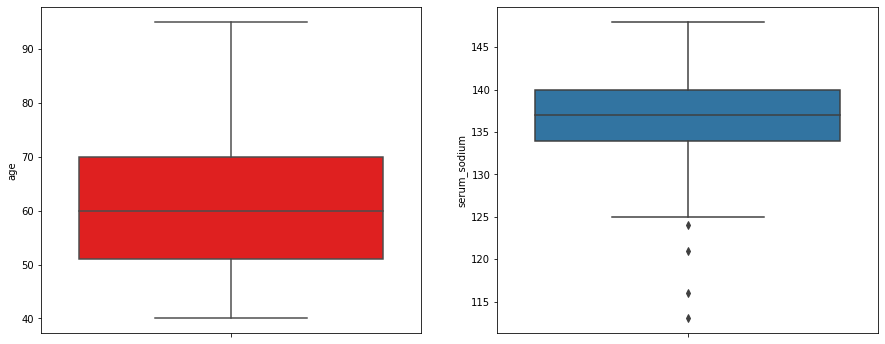

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df['age'], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df['serum_sodium'])
plt.show()

These boxplots show the distribution range amongst the patients for age and serum_sodium. The distribution for age looks good. The serum_sodium distribution is skewed toward higher end and there are some outliers in the lower end. These outliers seem possible if they are related to disease and outcome.

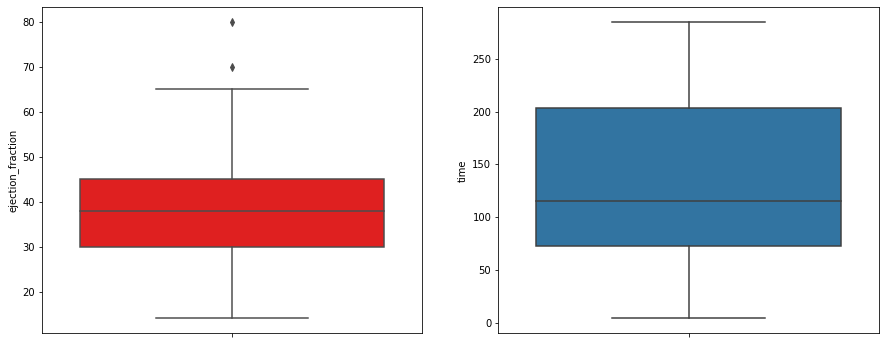

In [10]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df['ejection_fraction'], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df['time'])
plt.show()

These boxplots show the distribution range amongst the patients for ejection_fraction and time. Both distributions look good. The ejection_fraction outliers seem possible if they are related to disease and outcome.

Let's run a value count on each column to check for typos, mispelling and reporting errors.

In [11]:
#value counts
df['age'].value_counts()

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
80.000     7
72.000     7
42.000     7
40.000     7
85.000     6
62.000     5
68.000     5
52.000     5
49.000     4
61.000     4
51.000     4
73.000     4
59.000     4
46.000     3
64.000     3
82.000     3
90.000     3
69.000     3
95.000     2
48.000     2
60.667     2
67.000     2
44.000     2
66.000     2
77.000     2
78.000     2
54.000     2
57.000     2
94.000     1
56.000     1
41.000     1
87.000     1
79.000     1
86.000     1
43.000     1
81.000     1
47.000     1
Name: age, dtype: int64

In [12]:
df['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [13]:
df['creatinine_phosphokinase'].value_counts() 

582     47
66       4
129      4
84       3
231      3
        ..
395      1
754      1
2334     1
2695     1
514      1
Name: creatinine_phosphokinase, Length: 208, dtype: int64

In [14]:
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [15]:
df['ejection_fraction'].value_counts()

35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15     2
62     2
17     2
80     1
70     1
65     1
14     1
Name: ejection_fraction, dtype: int64

In [16]:
df['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [17]:
df['platelets'].value_counts()

263358.03    25
271000.00     4
221000.00     4
255000.00     4
228000.00     4
             ..
330000.00     1
217000.00     1
268000.00     1
358000.00     1
448000.00     1
Name: platelets, Length: 176, dtype: int64

In [18]:
df['serum_creatinine'].value_counts()

1.00    50
0.90    32
1.10    32
1.20    24
0.80    24
1.30    20
0.70    19
1.18    11
1.40     9
1.70     9
1.83     8
1.60     6
1.90     5
1.50     5
2.10     5
1.80     4
0.60     4
2.30     3
2.70     3
2.50     3
3.50     2
3.00     2
2.40     2
0.50     1
2.00     1
0.75     1
9.00     1
4.00     1
5.00     1
3.20     1
3.70     1
2.90     1
9.40     1
2.20     1
6.10     1
3.80     1
5.80     1
6.80     1
4.40     1
3.40     1
Name: serum_creatinine, dtype: int64

In [19]:
df['serum_sodium'].value_counts()

136    40
137    38
140    35
134    32
138    23
139    22
135    16
132    14
141    12
142    11
133    10
145     9
130     9
144     5
131     5
143     3
127     3
128     2
129     2
116     1
124     1
121     1
148     1
125     1
126     1
146     1
113     1
Name: serum_sodium, dtype: int64

In [20]:
df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

In [21]:
df['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [22]:
df['time'].value_counts()

187    7
250    7
186    6
107    6
10     6
      ..
135    1
140    1
148    1
150    1
4      1
Name: time, Length: 148, dtype: int64

In [23]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Let's run some descriptive statistics on the dataframe

In [24]:
#stats
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Part 3

Target is DEATH_EVENT

Is it balanced?

In [25]:
# by using normalize = True with value_counts, our output is the percentage of each class (written as a decimal)
df['DEATH_EVENT'].value_counts(normalize = True)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

The data is not well balanced. DEATH_EVENT 0 or alive has a 67.89% preponderance while DEATH_EVENT 1 or dead is 32.10%.

In [26]:
dfDead = df[df['DEATH_EVENT'] == 1] #filter to only include Dead data
dfDead.shape

(96, 13)

In [27]:
dfAlive = df[df['DEATH_EVENT'] == 0] #filter to only include Alive data
dfAlive.shape

(203, 13)

Describe stats according to Dead/Alive status

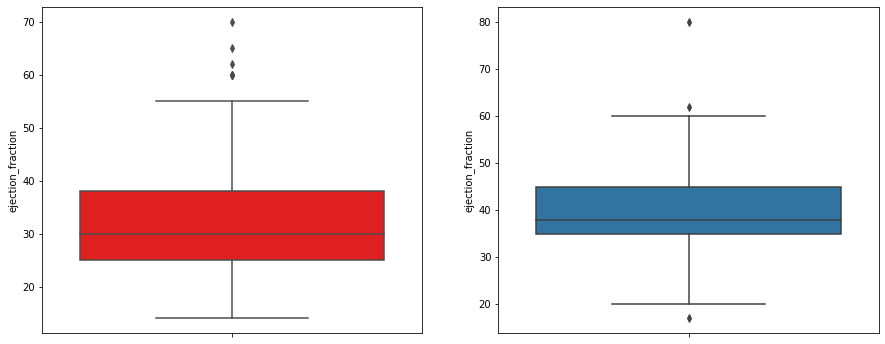

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dfDead['ejection_fraction'], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=dfAlive['ejection_fraction'])
plt.show()

In [29]:
dfDead['ejection_fraction'].describe()

count    96.000000
mean     33.468750
std      12.525303
min      14.000000
25%      25.000000
50%      30.000000
75%      38.000000
max      70.000000
Name: ejection_fraction, dtype: float64

In [30]:
dfAlive['ejection_fraction'].describe()

count    203.000000
mean      40.266010
std       10.859963
min       17.000000
25%       35.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

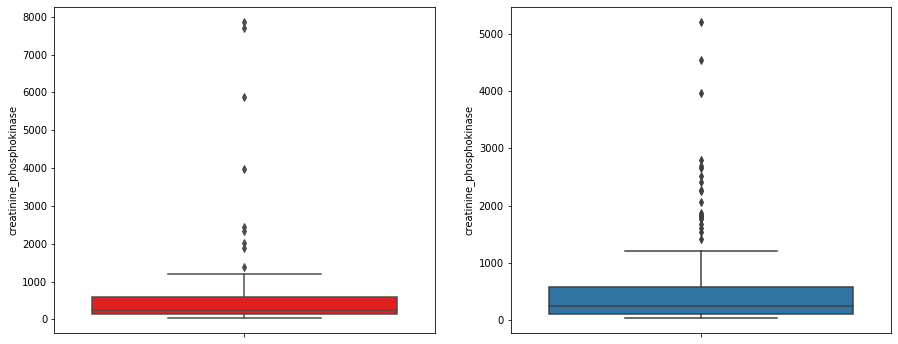

In [31]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dfDead['creatinine_phosphokinase'], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=dfAlive['creatinine_phosphokinase'])
plt.show()

In [32]:
dfDead['creatinine_phosphokinase'].describe()

count      96.000000
mean      670.197917
std      1316.580640
min        23.000000
25%       128.750000
50%       259.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

In [33]:
dfAlive['creatinine_phosphokinase'].describe()

count     203.000000
mean      540.054187
std       753.799572
min        30.000000
25%       109.000000
50%       245.000000
75%       582.000000
max      5209.000000
Name: creatinine_phosphokinase, dtype: float64

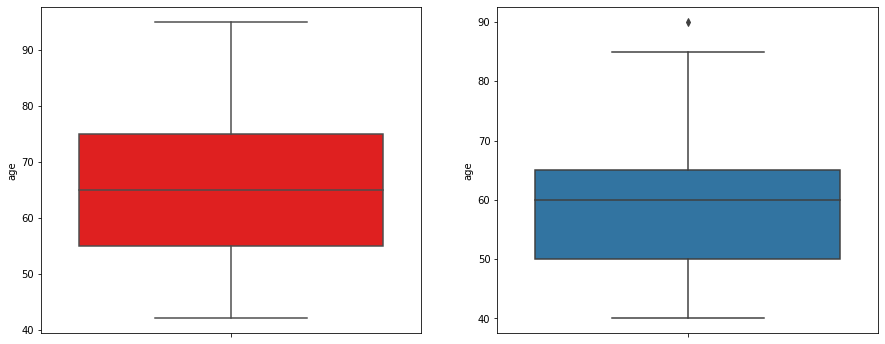

In [34]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dfDead['age'], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=dfAlive['age'])
plt.show()

In [35]:
dfDead['age'].describe()

count    96.000000
mean     65.215281
std      13.214556
min      42.000000
25%      55.000000
50%      65.000000
75%      75.000000
max      95.000000
Name: age, dtype: float64

In [36]:
dfAlive['age'].describe()

count    203.000000
mean      58.761906
std       10.637890
min       40.000000
25%       50.000000
50%       60.000000
75%       65.000000
max       90.000000
Name: age, dtype: float64

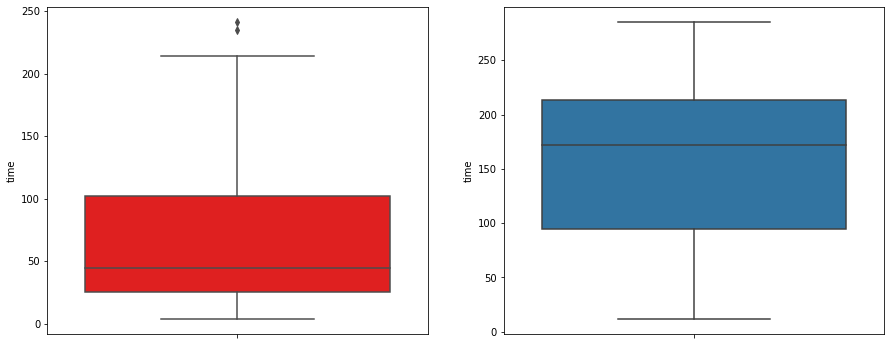

In [37]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dfDead['time'], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=dfAlive['time'])
plt.show()

In [38]:
dfDead['time'].describe()

count     96.000000
mean      70.885417
std       62.378281
min        4.000000
25%       25.500000
50%       44.500000
75%      102.250000
max      241.000000
Name: time, dtype: float64

In [39]:
dfAlive['time'].describe()

count    203.000000
mean     158.339901
std       67.742872
min       12.000000
25%       95.000000
50%      172.000000
75%      213.000000
max      285.000000
Name: time, dtype: float64

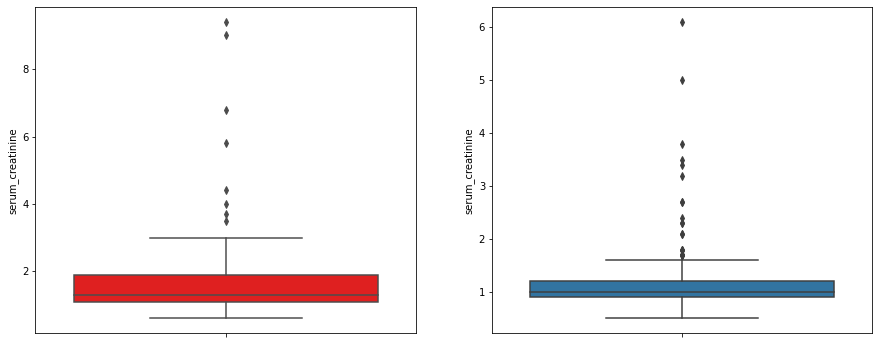

In [40]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dfDead['serum_creatinine'], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=dfAlive['serum_creatinine'])
plt.show()

In [41]:
dfDead['serum_creatinine'].describe()

count    96.000000
mean      1.835833
std       1.468562
min       0.600000
25%       1.075000
50%       1.300000
75%       1.900000
max       9.400000
Name: serum_creatinine, dtype: float64

In [42]:
dfAlive['serum_creatinine'].describe()

count    203.000000
mean       1.184877
std        0.654083
min        0.500000
25%        0.900000
50%        1.000000
75%        1.200000
max        6.100000
Name: serum_creatinine, dtype: float64

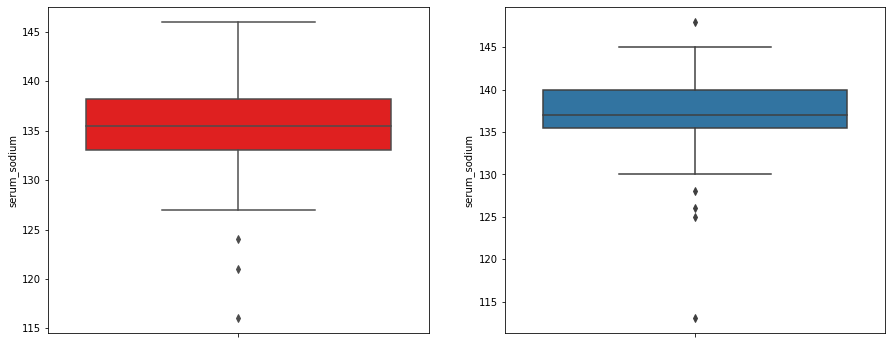

In [43]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dfDead['serum_sodium'], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=dfAlive['serum_sodium'])
plt.show()

In [44]:
dfDead['serum_sodium'].describe()

count     96.000000
mean     135.375000
std        5.001579
min      116.000000
25%      133.000000
50%      135.500000
75%      138.250000
max      146.000000
Name: serum_sodium, dtype: float64

In [45]:
dfAlive['serum_sodium'].describe()

count    203.000000
mean     137.216749
std        3.982923
min      113.000000
25%      135.500000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

Correlation

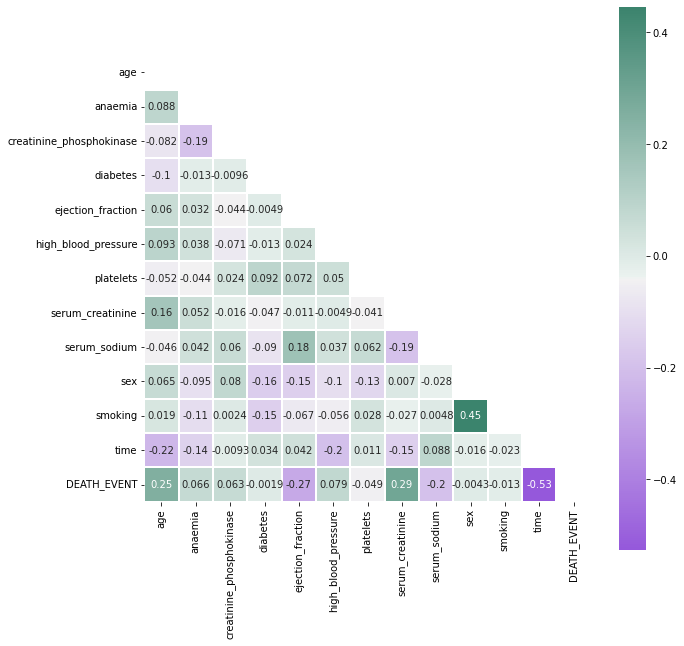

In [46]:
# correlation between all features
corrMat = df.corr()
fig, ax = plt.subplots(figsize = (10,10))
cmap = sns.diverging_palette(1000, 7000, as_cmap = True)
mask = np.triu(np.ones_like(corrMat, dtype = bool))
sns.heatmap(corrMat, square = True, annot = True, linewidths = 1, cmap = cmap, mask = mask);

Drop Time column

In [47]:
df1 = df.drop(columns='time')

In [48]:
df1.head(0)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT


Modeling

Assign target and Features

In [49]:
#assign the target (y) and features (X)
y = df1['DEATH_EVENT']
X = df1.drop(columns = 'DEATH_EVENT')

Run a baseline

In [50]:
#Establish a simple baseline "model". 
#What if all predictions were just the mean of the target? 
# for a binary classification pbr we need 
#to divide most common class over the total for the target
baseline = 209/299
print ('Accuracy of baseline is:', "{:.2f}%".format(100* baseline))

Accuracy of baseline is: 69.90%


Train Test Split

In [51]:
#Train Test Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state = 42)

Here we are predicting a binary target coded 0 or 1. It is a binary classification problem for which we will use classifier methods. 

List our table for accuracy for different methods

In [52]:
accuracy_list = []

In [53]:
accuracy_list.append(100*baseline)

Remember to fit on the training set and transform both training and test sets

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only
scaler.fit(X_train)
# Apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

KNN

In [55]:
#step 1 import the model you want to use
from sklearn.neighbors import KNeighborsClassifier
#step 2 make an instance of the Model
knn = KNeighborsClassifier()
# Looking at some hyperparameters that seem tunable
print(knn)
#Model is learning the relationship between x and y
knn.fit(X_train, y_train)
#step 4 predict the values of same data it was fit on
predictions = knn.predict(X_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [56]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

In [57]:
# calculate classification accuracy
scoreKNN = knn.score(X_train, y_train)
print ('Accuracy of KNN default is:', "{:.2f}%".format(100* scoreKNN))

Accuracy of KNN default is: 74.55%


In [58]:
accuracy_list.append(100*scoreKNN)

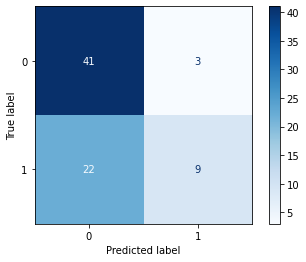

In [59]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap = 'Blues', values_format = 'd');

In [60]:
from sklearn.model_selection import GridSearchCV
# define a dictionary of the parameters you want to tune and the values you want to try out
params = {'n_neighbors': [5, 10, 25, 50, 55, 75]}
# instantiate and fit gridsearch
gs = GridSearchCV(KNeighborsClassifier(), param_grid = params)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 10, 25, 50, 55, 75]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [61]:
gs.best_params_

{'n_neighbors': 10}


Optimize with n_neighbors=5

In [68]:
#step 2 make an instance of the Model
knn_10 = KNeighborsClassifier(n_neighbors=10)
#step 3 Training the model on the data, 
knn_10.fit(X_train, y_train)
#step 4 predict the values of same data it was fit on
predictions_10 =knn_10.predict(X_train)
predictions_10

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [70]:
# calculate classification accuracy
scoreKNN_10 = knn_10.score(X_train, y_train)
print('Accuracy of KNN n_neighbor =10 is:', "{:.2f}%".format(100* scoreKNN_10))

Accuracy of KNN n_neighbor =10 is: 74.11%


In [71]:
accuracy_list.append(100*scoreKNN_10)

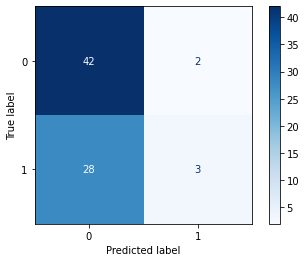

In [72]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_10, X_test, y_test, cmap = 'Blues', values_format = 'd');

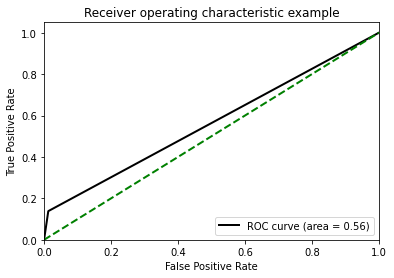

In [74]:
#Compute ROC curve and ROC area for predictions on train set
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_train, predictions_10)
roc_auc = auc(fpr, tpr)

#Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='black',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

A Receiver Operator Characteristic (ROC) curve is a graphical plot used to show the diagnostic ability of binary classifiers.

It shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR).  As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). Here after a gridsearch and optimization the ROC curve remains close to the 45-degree diagonal of the ROC space. 



Our baseline returned a value of 0.69 while our optimized KNN returned an accuracy of 77.65%. This method is better than the baseline. The optimized model according to the confusion matrix predicts better true positives and true negatives.

Random Forest Classifier

In [81]:
# step 1 import random forest Regressor
from sklearn.ensemble import RandomForestClassifier
# Step 2: Make an instance of the Model
rf_class = RandomForestClassifier(random_state = 42)
# Step 3: Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
rf_class.fit(X_train, y_train)
# Step 4: Predict the values for y 
#(remember that this step just allows you to see the actual predictions)
#(but is not necessary for evaluating or tuning your model)
rf_class.predict(X_test)
# Step 5: Evaluate your model performance
rf_class_train_score = rf_class.score(X_train, y_train)
rf_class_test_score = rf_class.score(X_test, y_test)
print(rf_class_train_score)
print(rf_class_test_score)

1.0
0.6666666666666666


Our output shows that our training score is 1 and test score is 0.67. The metric used in the classifier is accuracy. Our test score shows that we may mislabel 33% as belonging to the wrong class. The default Random Forest is performing worse than the baseline. Let's see if we can improve on its accuracy.

In [83]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 50)) # will try every value between 2 and 50
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    rf_class = RandomForestClassifier(max_depth = depth, 
                             random_state = 42)
    rf_class.fit(X_train, y_train)
    score = rf_class.score(X_test, y_test)
    r2.append(score)

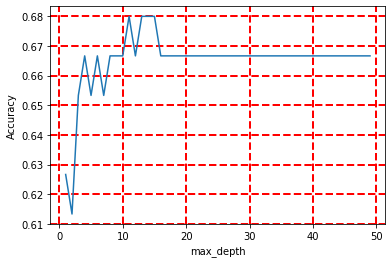

In [86]:
#To help us see the results of trying various tree depths, 
#the following code creates a visualization of R2 vs max_depth
# Visualize which max_depth leads to the highest accuracy score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.grid(color='r', linestyle='--', linewidth=2)
plt.ylabel('Accuracy');

In [93]:
# Let's run the model with our optimized value for max_depth , 11
rf_class_11 = RandomForestClassifier(max_depth = 11, random_state = 42)
rf_class_11.fit(X_train, y_train)
train_11_score = rf_class_11.score(X_train, y_train)
test_11_score = rf_class_11.score(X_test, y_test)
print(train_11_score)
print(test_11_score)

1.0
0.68


With the Random Forest Tree classifier the best accuracy score is obtained with a depth of 11.

In [95]:
# model-random forest classifier feature importance
data = {'Feature': X.columns, 'Importance': rf_class_11.feature_importances_}
feature_importances = pd.DataFrame(data)
feature_importances

,Feature,Importance
0,age,0.150865
1,anaemia,0.019243
2,creatinine_phosphokinase,0.125589
3,diabetes,0.021513
4,ejection_fraction,0.166131
5,high_blood_pressure,0.018452
6,platelets,0.115297
7,serum_creatinine,0.237321
8,serum_sodium,0.105245
9,sex,0.021577


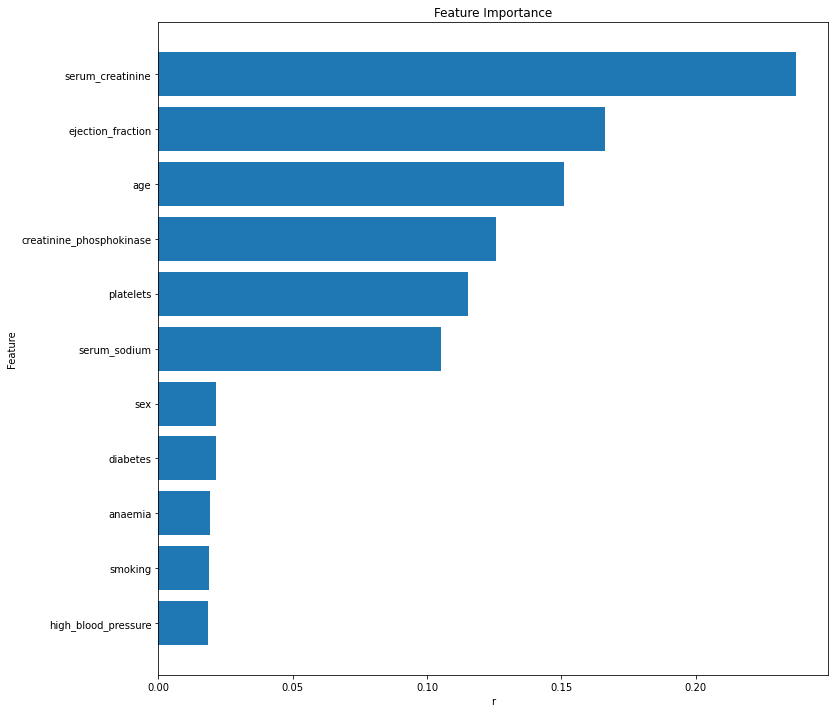

In [96]:
feature_importances.sort_values(by = 'Importance', inplace = True)
plt.figure(figsize = (12, 12))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('r')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show();

The most important feature to predict the class DEATH_EVENT are serum creatinine, ejection fration which are negatively correlated with a heatmap which means they are linked with outcome 1 = death.

Conclusion

Our reasonning to decide which algorithm to use needs to take under consideration a number of factors. For exemple:

1- What is the type of problem we are trying to solve?

Here it is a binary classification problem since we want to predict a class 0 or 1 for DEATH_EVENT to better assist patient prognosis and treatment after heart failure. We also want to reveal predictors to complement Drs expertise. We then opt to use a classifier ML method.

2- Few factors to consider for choice of classifier ML method?

Size of our dataset, here we have a dataset constituted of 299 entries and 13 columns; But the dataset will increase as more patients will be recruited under medical care.

In this exercise we chose to perform Random Forest Classifier and KNN Classifier and their score is a measure of accuracy to predict class accurately. We also performed some confusion matrix to complement with measures of sensitivity, specificity and precision our KNN models. We also performed a ROC curve.

From forum discussion at https://datascience.stackexchange.com/questions/9228/decision-tree-vs-knn

Random Forest Classifier is an "Eager Learner": when split/train/test, it first builds a classification model on the training dataset before being able to actually classify a hiden observation from the test dataset. This learned model is now "eager" (read hungry) to classify the unseen datapoints.

The KNN Classifier is a "Lazy Learner": it does not build any classification model, but directly learns from the training dataset and starts processing data only when it is given a test datapoint to classify.

Based on these characteristics, in the long run in a medical office/hospital, as datasets grow incrementally (patient per patient), a KNN method might work better than a Random Forest.

In this exercise our baseline accuracy is 69%, optimized KNN 74.11% and optimized Random Forest Classifier 68%. Our Random Forest Classifer model is outperformd by a baseline which means we will not use it. KNN is better suited for our project. Features of importance to predict the event of death are serum creatinine and ejection fraction. More discussion with subject experts are necessary to perhaps tweak our data better and improve our model better.